## 1 -  Working with perceptron algorithm

**Question 1 :**

a- the computational time complexity is O(n*m) <br/>
b- the space complexity is S(p)= C+ Sp = 3 + n

## 2 - Implementation

the first step is to create the Dataset. For that we use def_dataset

In [17]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
def def_dataset(sig):    
   
    np.random.seed(0)
    
    #the first 125 points follow the Gaussian distribution where mu1=(-1,0)
    mu1=[-1,0]
    X11=np.random.normal(mu1[0],sig,(125, 1))
    X12=np.random.normal(mu1[1],sig,(125,1))
    X1=np.column_stack([np.ones(125),X11,X12])
    
    #the rest follow the Gaussian distribution where mu2=(1,0)
    mu2=[1,0]
    X21=np.random.normal(mu2[0],sig,(125, 1))
    X22=np.random.normal(mu2[1],sig,(125,1))
    X2=np.column_stack([np.ones(125),X21,X22])

    #generating labels
    Y1=np.full((125, 1),-1)
    Y2=np.full((125, 1),1)
    Y=np.concatenate((Y1,Y2),axis=0)
    # creating the dataset
    dataset=np.concatenate((np.column_stack([X1,Y1]),np.column_stack([X2,Y2])),axis=0)
    data=np.concatenate((X1,X2),axis=0)
    return data , Y
def_dataset(math.sqrt(0.25))


(array([[ 1.        , -0.11797383, -0.07481727],
        [ 1.        , -0.7999214 , -0.21757678],
        [ 1.        , -0.51063101,  0.92463186],
        [ 1.        ,  0.1204466 ,  0.33614738],
        [ 1.        , -0.066221  ,  0.20373092],
        [ 1.        , -1.48863894, -0.38495804],
        [ 1.        , -0.52495579,  0.2696246 ],
        [ 1.        , -1.0756786 , -0.33716633],
        [ 1.        , -1.05160943,  0.01591528],
        [ 1.        , -0.79470075, -0.31792304],
        [ 1.        , -0.92797821,  0.33821665],
        [ 1.        , -0.27286325,  0.28829541],
        [ 1.        , -0.61948114, -0.10414938],
        [ 1.        , -0.93916249,  0.19800336],
        [ 1.        , -0.77806838, -0.54653075],
        [ 1.        , -0.83316284, -0.7456288 ],
        [ 1.        , -0.25296046,  0.21969585],
        [ 1.        , -1.10257913,  0.08333675],
        [ 1.        , -0.84346615,  0.31751572],
        [ 1.        , -1.42704787,  1.19157239],
        [ 1.        

Next, implement the perceptron algorithm

In [21]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

def perceptron(X_train,Y_train) :
    iter = 1000
    weights = np.zeros(3)

    for _ in range(iter):
        for xi, value in zip(X_train, y_train):
            if  value * np.dot(weights, xi)<=0 :
                weights1 = weights + value * xi
        if np.array_equal( weights1 ,weights) :
            break
        weights = weights1
    x01 = np.amin(X_train[:, 1])
    x02 = np.amax(X_train[:, 1])
    x11 = (-weights[1] * x01 - weights[0]) / weights[2]
    x12 = (-weights[1] * x02 - weights[0]) / weights[2]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    col = np.where(Y_train[:, 0]<1,'b',"r")
    plt.scatter(X_train[:, 1], X_train[:, 2], color = col)
    ax.plot([x01, x02], [x11, x12], "g")
    ymin = np.amin(X_train[:, 2])
    ymax = np.amax(X_train[:, 2])
    ax.set_ylim([ymin -1, ymax + 1 ])

    return weights


In [22]:
def predict(X_test,y_test , weights):
    num_samples, n_features = X_test.shape
    err = 0
    for X_test, value in zip(X_test, y_test):
        y = np.dot(X_test,weights)
        if value *  y <=0 :
            err= err + 1/num_samples
    return err


**2-2 Experiements**  <br/>
**Experiment 1**

In [27]:
data,Y =def_dataset(math.sqrt(0.25))


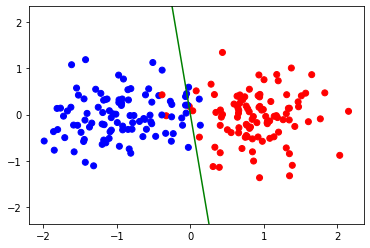

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state=42, stratify=Y)
weights=perceptron(X_train,y_train)

**Q3**

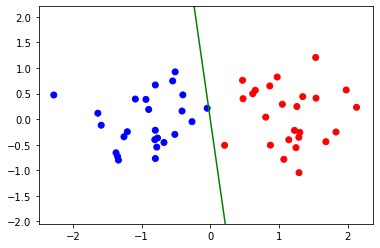

accuracy =  1


In [30]:
accuracy = 1 -predict(X_test,y_test , weights)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x01 = np.amin(X_train[:, 1])
x02 = np.amax(X_train[:, 1])

x11 = (-weights[1] * x01 - weights[0])/weights[2]
x12 = (-weights[1] * x02 - weights[0])/weights[2]

col = np.where(y_test[:, 0]<1,'b',"r")
plt.scatter(X_test[:, 1], X_test[:, 2], color=col)
ax.plot([x01, x02], [x11, x12], "g")

ymin = np.amin(X_test[:, 2])
ymax = np.amax(X_test[:, 2])
ax.set_ylim([ymin -1, ymax + 1 ])

plt.show()
print("accuracy = " , accuracy)

**Experiment 2**

In [31]:
data , Y =def_dataset(math.sqrt(0.75))


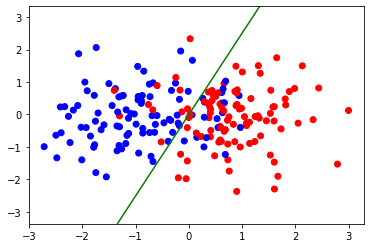

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state=42, stratify=Y)
weights=perceptron(X_train,y_train)

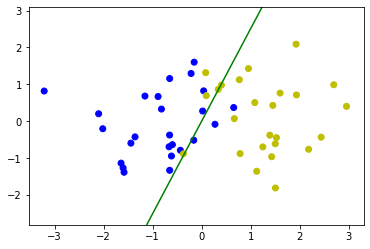

0.86


In [33]:
accuracy = 1 -predict(X_test,y_test , weights)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x0_1 = np.amin(X_train[:, 1])
x0_2 = np.amax(X_train[:, 1])

x1_1 = (-weights[1] * x0_1 - weights[0]) / weights[2]
x1_2 = (-weights[1] * x0_2 - weights[0]) / weights[2]

col = np.where(y_test[:, 0]<1,'b',"y")
plt.scatter(X_test[:, 1], X_test[:, 2], color = col)
ax.plot([x0_1, x0_2], [x1_1, x1_2], "g")

    
ymin = np.amin(X_test[:, 2])
ymax = np.amax(X_test[:, 2])
ax.set_ylim([ymin -1, ymax + 1 ])

plt.show()
print(accuracy)